# Рыжова А. з3530903/90301 - практическая 4

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
v = ord('Р') % 9
v

3

### 1. Выполните описательный анализ
#### Вариант 3 - марка автомобиля hyundi

In [118]:
hyundi = pd.read_csv("hyundi.csv")
hyundi.shape

(4860, 9)

In [119]:
hyundi.sample(10)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
2761,I20,2020,11995,Manual,2310,Petrol,145,46.3,1.2
470,Tucson,2019,15498,Manual,11896,Petrol,145,34.9,1.6
913,Ioniq,2019,17250,Automatic,1267,Hybrid,135,78.5,1.6
1029,I30,2017,8995,Manual,23786,Petrol,145,48.7,1.4
2107,I20,2018,11000,Manual,4309,Petrol,150,55.4,1.2
1091,Santa Fe,2016,15995,Automatic,42812,Diesel,235,42.2,2.2
2293,I10,2018,7995,Manual,5145,Petrol,145,60.1,1.0
1798,I10,2019,10790,Manual,50,Petrol,145,49.6,1.0
2391,Kona,2018,13100,Manual,14682,Petrol,145,44.1,1.0
3844,I30,2019,23995,Manual,1853,Petrol,145,34.0,2.0


### Показатели:

- **model** - модель
- **year** - год сборки
- **price** - цена (целевой показатель)
- **transmission** - тип коробки передач
- **mileage** - пробег автомобиля (км)
- **fuelType** - тип заливаемого топлива
- **tax** - дорожный налог
- **mpg** - расход топлива (миль/галлон)
- **engineSize** - объем двигателя (л)

In [120]:
hyundi.model.value_counts()

 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: model, dtype: int64

In [121]:
# меняем порядок столбцов для удобства
hyundi = hyundi.reindex(columns=['model','year','engineSize','mileage','mpg','transmission','fuelType','tax(£)','price'])
hyundi.head()

,model,year,engineSize,mileage,mpg,transmission,fuelType,tax(£),price
0,I20,2017,1.2,17307,58.9,Manual,Petrol,145,7999
1,Tucson,2016,2.0,25233,43.5,Automatic,Diesel,235,14499
2,Tucson,2016,1.7,37877,61.7,Manual,Diesel,30,11399
3,I10,2016,1.0,23789,60.1,Manual,Petrol,20,6499
4,IX35,2015,2.0,33177,51.4,Manual,Diesel,160,10199


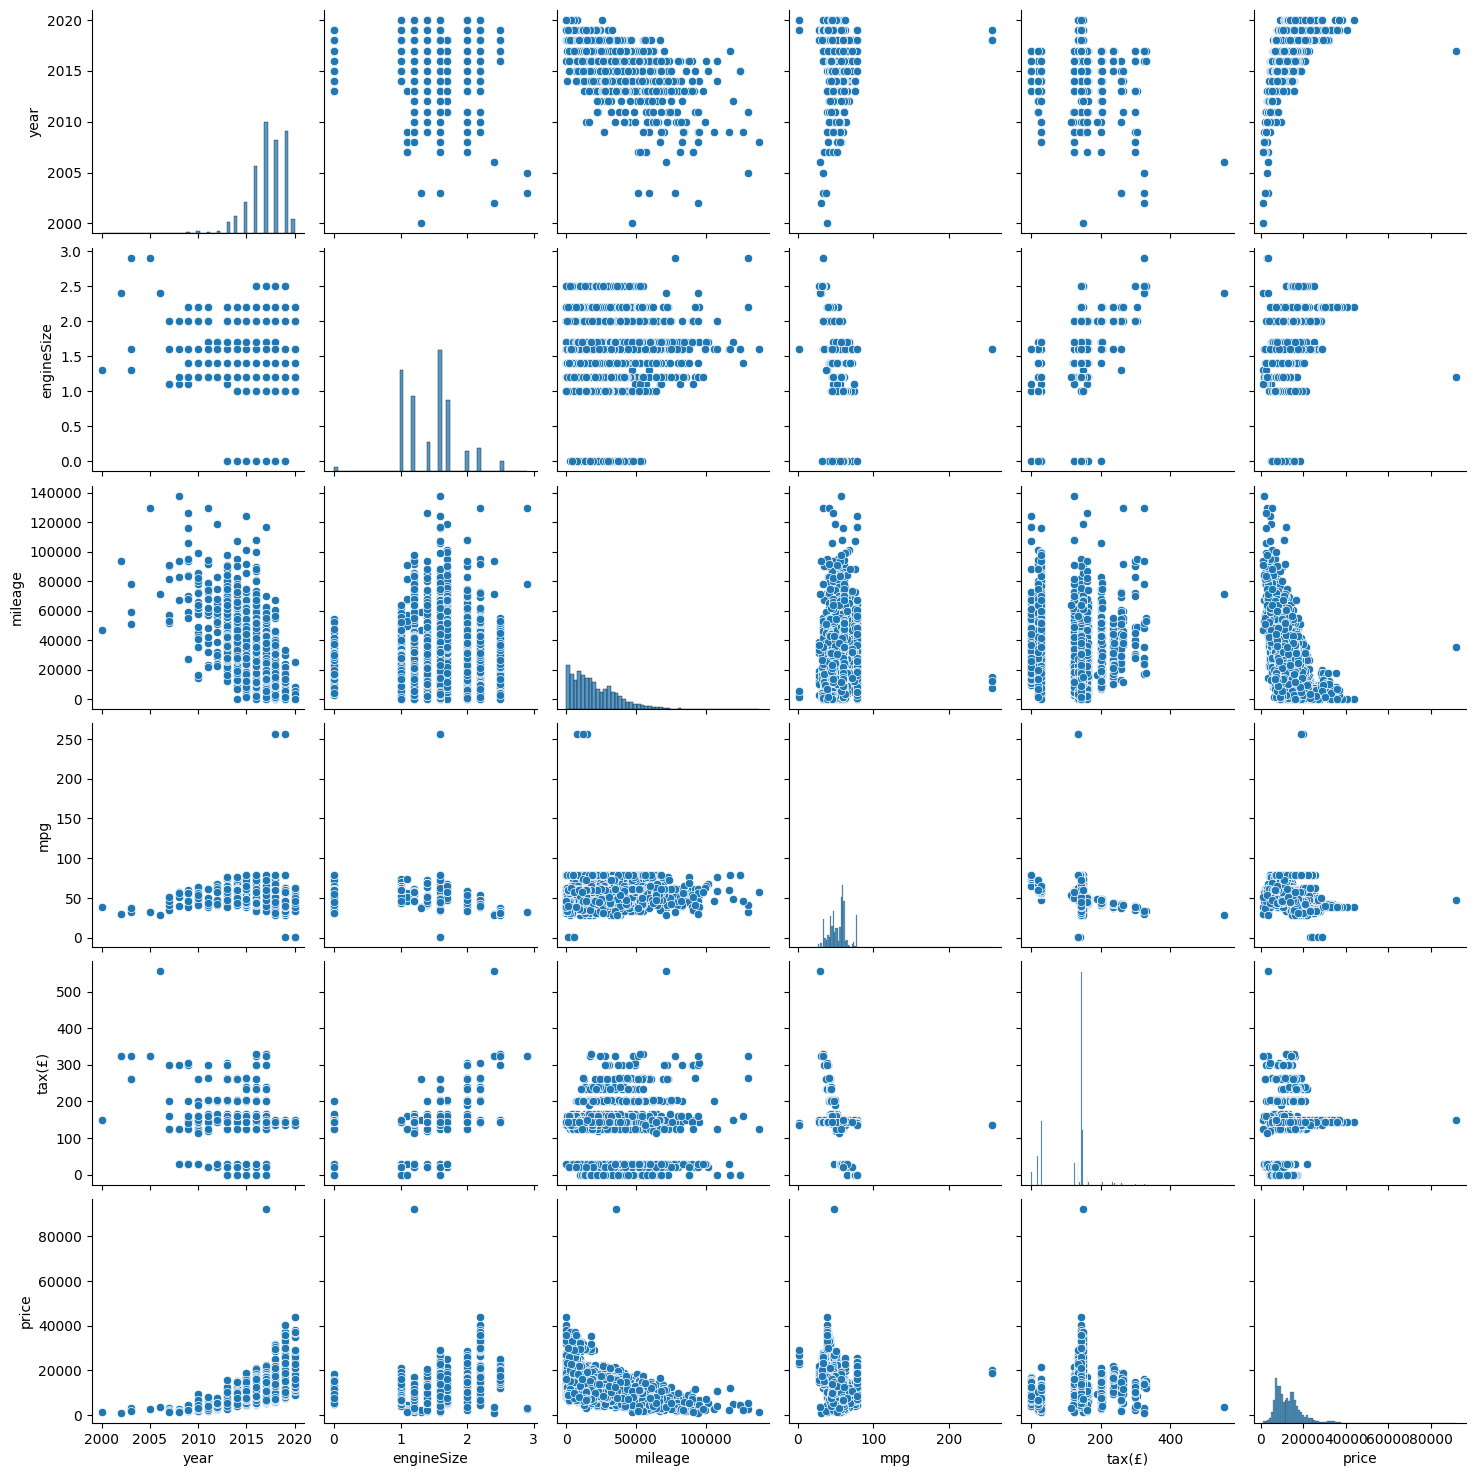

In [122]:
# сетка точечных диаграм - попарные (пары столбцов) отношения значений в DataFrame
sns.pairplot(hyundi)

/var/folders/l3/lnw5j7557018n348ys0rs08m0000gn/T/ipykernel_42075/4179474171.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hyundi.corr(method = 'kendall'), annot = True)


<AxesSubplot: >

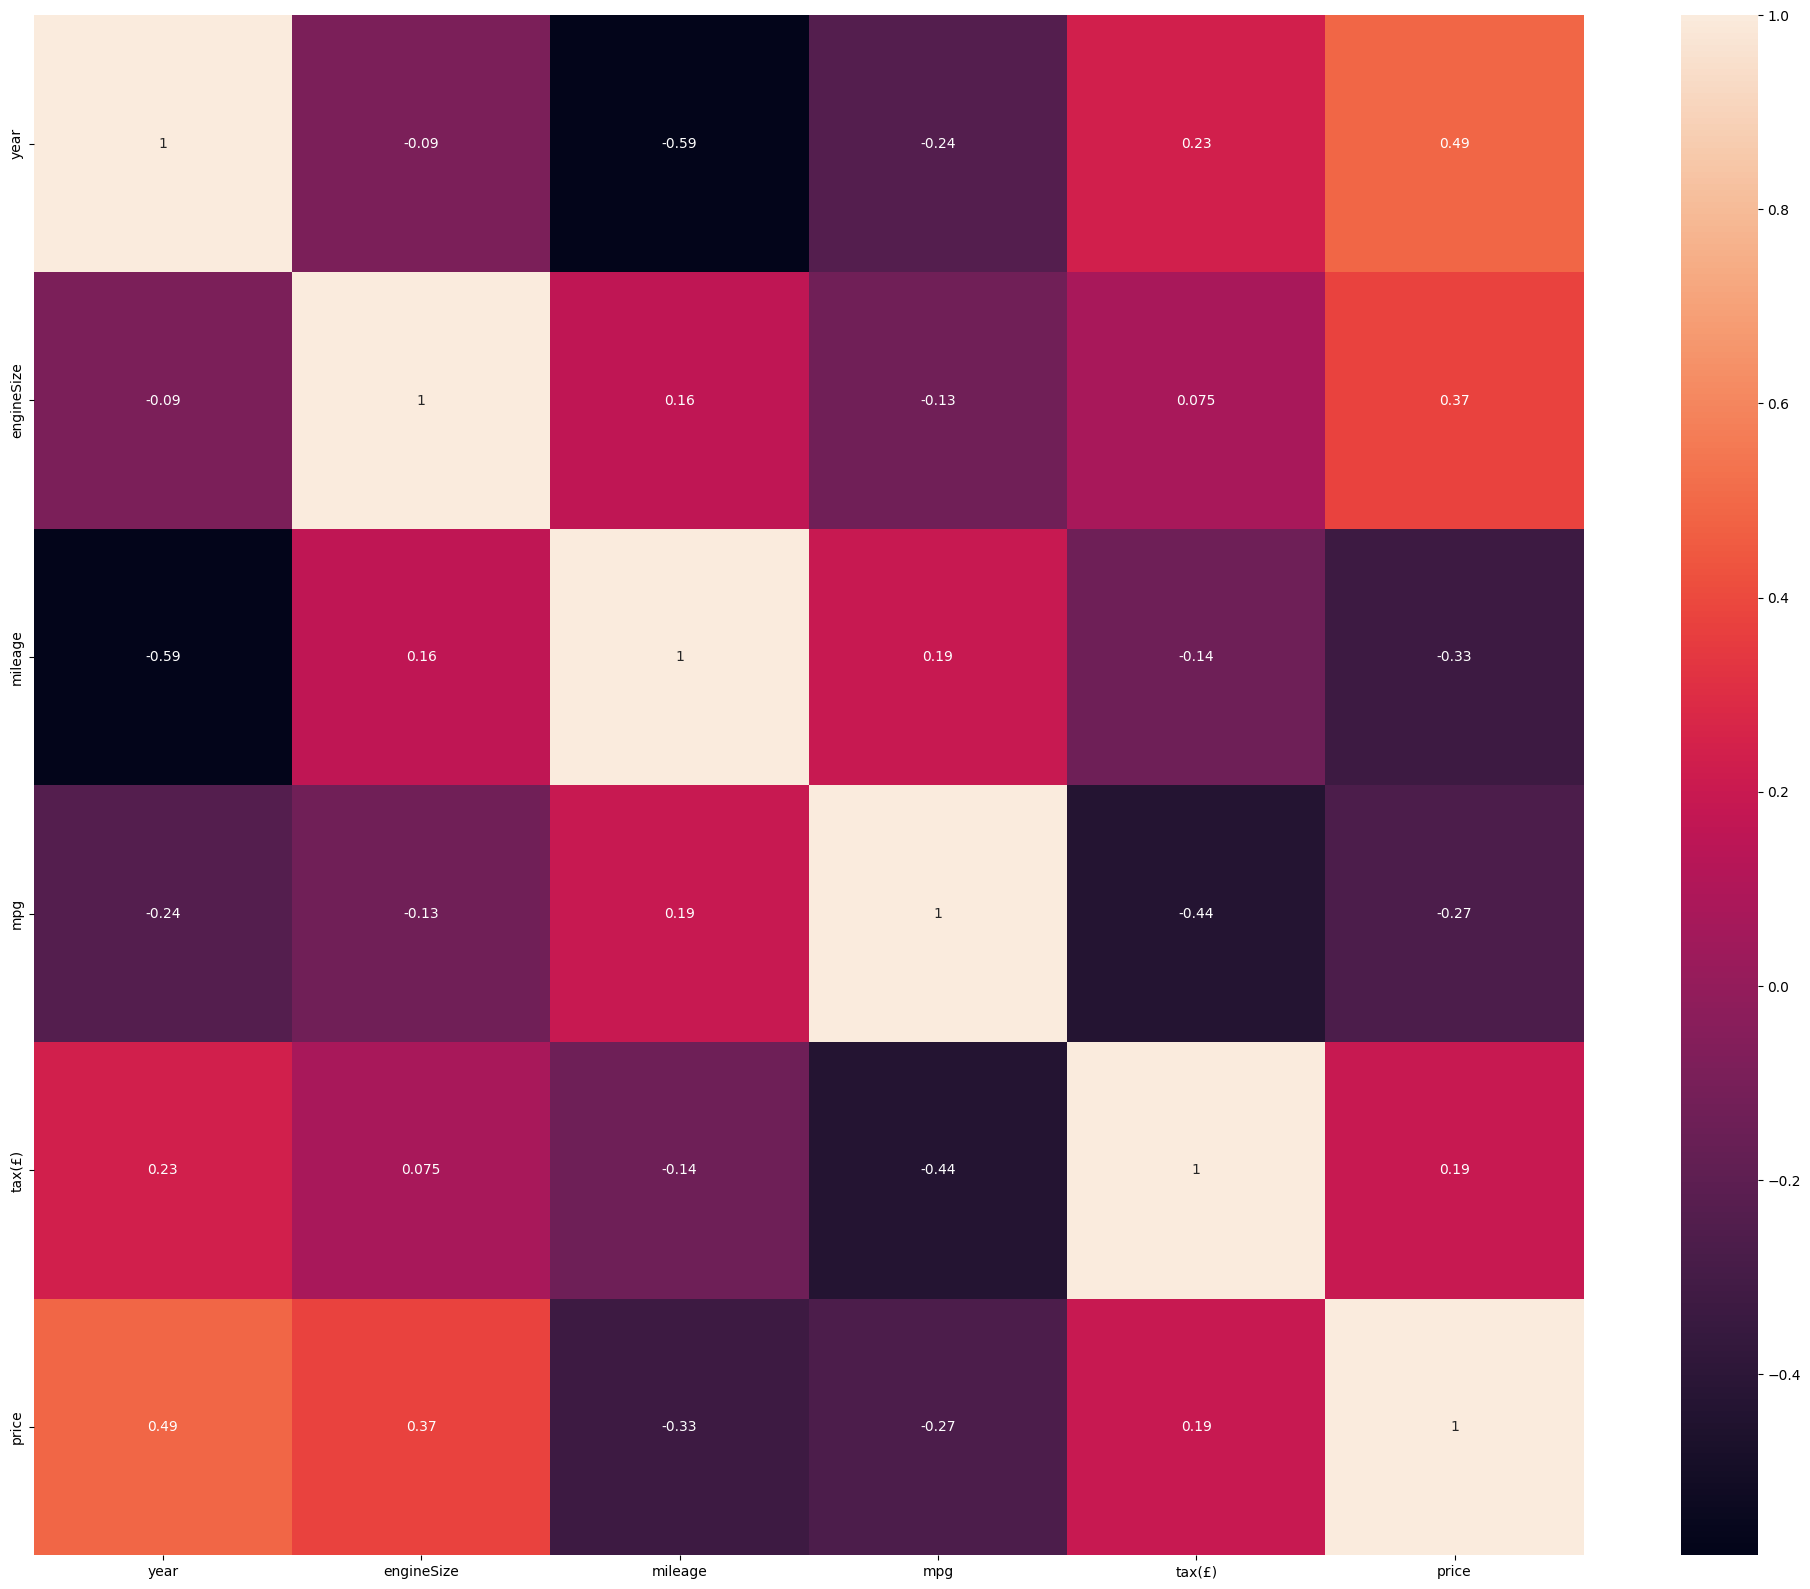

In [123]:
# коэффициенты корреляции
plt.figure(figsize = (25, 20))
# цветная матрица, используем метод kendall - коэффициент ранговой корреляции Кендалла 
# мера линейной связи между случайными величинами
sns.heatmap(hyundi.corr(method = 'kendall'), annot = True)

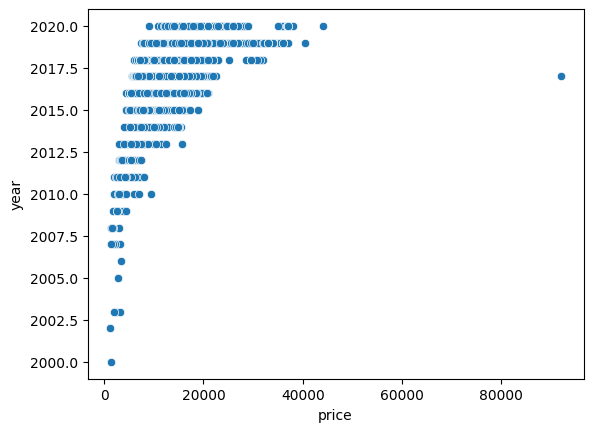

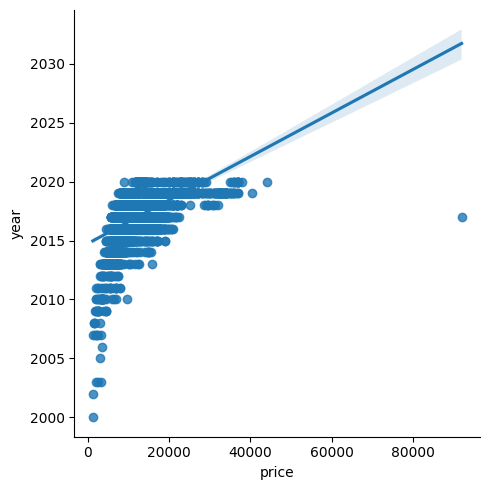

In [124]:
# график и линейная аппроксимация зависимости цены от года выпуска
# диаграмма рассеяния
sns.scatterplot(x = "price", y = "year", data = hyundi)
# базовая диаграмма рассеяния + линия регрессии
sns.lmplot(x = "price", y = "year", data = hyundi)

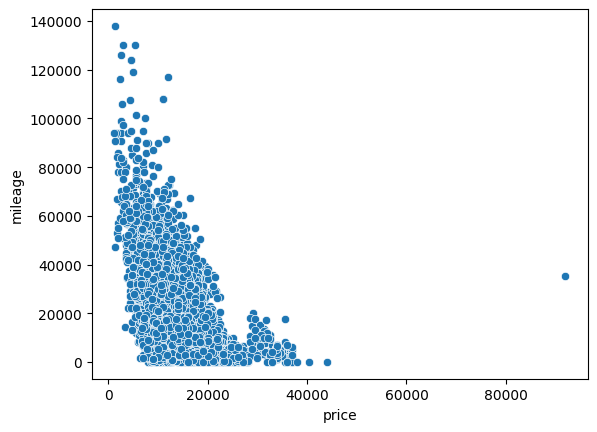

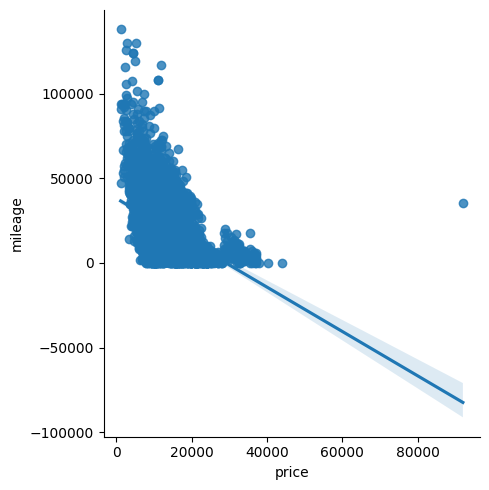

In [125]:
# график и линейная аппроксимация зависимости цены от прбега автомобиля
sns.scatterplot(x = "price", y = "mileage", data = hyundi)
sns.lmplot(x = "price", y = "mileage", data = hyundi)

<AxesSubplot: xlabel='fuelType', ylabel='price'>

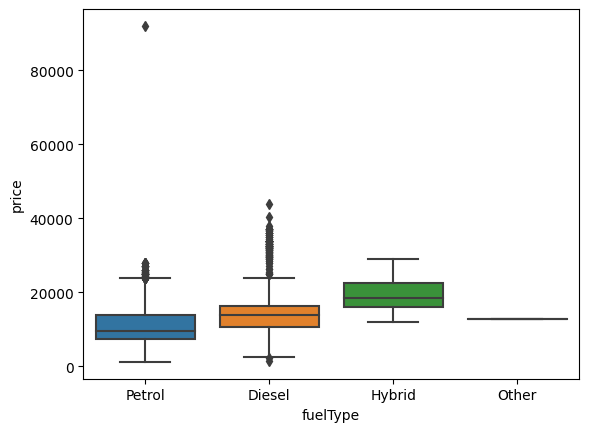

In [126]:
# распределение цены по типу заливаемого топлива - одномерное распределение вероятностей
sns.boxplot(y = "price", x = "fuelType", data = hyundi)

### 2. Постройте базовые регрессионные модели

In [127]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# подготовка обучающей и тестовой выборки
X = hyundi.drop("price", axis=1)
Y = hyundi.price
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print("Размер обучающей выборки X: ", X_train.shape)
print("Размер обучающей выборки Y: ", Y_train.shape)
print("Размер тестовой выборки X: ", X_test.shape)
print("Размер тестовой выборки Y: ", Y_test.shape)

Размер обучающей выборки X:  (3402, 8)
Размер обучающей выборки Y:  (3402,)
Размер тестовой выборки X:  (1458, 8)
Размер тестовой выборки Y:  (1458,)


In [128]:
# базовая модель - (среднее значение целевого показателя)
base = Y_train.mean()
Y_base = Y_test.copy()
# копируем в тестовую выборку среднее тренировочных значений
Y_base[Y_base>0] = base
# корень cреднеквадратичного отклонения (squared = Falsе => RMSE)
print(f'RMSE: {round(metrics.mean_squared_error(Y_test, Y_base, squared = False),4)}')

RMSE: 6363.0884


In [129]:
# базовая модель - (ConstantByGroup) - средняя цена по группе (модель автомобиля)
temp = hyundi[["model", "price"]]
temp['avg'] = temp.groupby(["model"]).transform('mean')
Y_base = Y_test.copy()
Y_base[Y_base>0] = temp.iloc[:,-1]
# корень cреднеквадратичного отклонения (squared = Falsе => RMSE)
print(f'RMSE: {round(metrics.mean_squared_error(Y_test, Y_base, squared = False),4)}')

RMSE: 4424.0097


/var/folders/l3/lnw5j7557018n348ys0rs08m0000gn/T/ipykernel_42075/237507271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['avg'] = temp.groupby(["model"]).transform('mean')


In [130]:
# OneParamModel - на основе показателя "price"
temp = hyundi[["price"]]
Y_base = Y_test.copy()
Y_base[Y_base>0] = temp.iloc[:,-1]
# корень cреднеквадратичного отклонения (squared = Falsе => RMSE)
print(f'RMSE: {round(metrics.mean_squared_error(Y_test, Y_base, squared = False),4)}')

RMSE: 0.0


### 3. Постройте линейные регрессионные модели для прогноза целевого показателя 

In [131]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV

# прогноз по одному показателю 

LR_One = LinearRegression()
# обучение модели на данных
# формируем из строки столбец
X_train_One = X_train["year"].values.reshape(-1, 1)
# формируем из строки столбец
X_test_One = X_test["year"].values.reshape(-1, 1)
LR_One.fit(X_train_One, Y_train)
# вычисление прогноза на тестовых данных
Y_test_LR_One = LR_One.predict(X_test_One)
# вычисление ошибки
metrics.mean_squared_error(Y_test, Y_test_LR_One, squared = False)

5268.22238354944

In [132]:
# выведем коэффициенты модели
print("Смещение =", LR_One.intercept_)
# оценочные коэффициенты для задачи линейной регрессии
print("Коэффициент =", LR_One.coef_)

Смещение = -3533410.6588932537
Коэффициент = [1758.02729245]


In [133]:
# расчитаем прогнозируемое значение
y_manual = LR_One.intercept_ + X_test["year"][0:5] * LR_One.coef_ 
pd.DataFrame({ "Predicted calculated" : y_manual, "Predicted" : Y_test_LR_One[0:5], "Real" : Y_test[0:5] } )

/var/folders/l3/lnw5j7557018n348ys0rs08m0000gn/T/ipykernel_42075/3654712777.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_manual = LR_One.intercept_ + X_test["year"][0:5] * LR_One.coef_
/var/folders/l3/lnw5j7557018n348ys0rs08m0000gn/T/ipykernel_42075/3654712777.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pd.DataFrame({ "Predicted calculated" : y_manual, "Predicted" : Y_test_LR_One[0:5], "Real" : Y_test[0:5] } )


,Predicted calculated,Predicted,Real
4757,10772.362680,10772.362680,7995
515,9014.335387,9014.335387,5998
46,14288.417265,14288.417265,10300
607,12530.389972,12530.389972,15395
1156,17804.471850,17804.471850,25180


In [134]:
# прогноз по всем показателям

# тренировочные и тестовые данные для количественных показателей
X_train_2 = X_train.drop(columns = ["model", "transmission", "fuelType"])
Y_train_2 = Y_train.drop(columns = ["model", "transmission", "fuelType"])
X_test_2 = X_test.drop(columns = ["model", "transmission", "fuelType"])
Y_test_2 = Y_test.drop(columns = ["model", "transmission", "fuelType"])

# линейная регрессия для всех количественных показателей
LR_All = LinearRegression()
# обучение модели на данных
LR_All.fit(X_train_2, Y_train_2)
# вычисление прогноза на тестовых данных
Y_test_LR_All = LR_All.predict(X_test_2)
# вычисление ошибки
metrics.mean_squared_error(Y_test, Y_test_LR_All, squared = False)

4025.4357596472955

In [135]:
# отображаем коэффициенты по показателям
pd.Series(LR_All.coef_, index=X_train_2.columns)

year          1232.822194
engineSize    8581.708838
mileage         -0.084331
mpg            -38.157565
tax(£)           0.140125
dtype: float64

#### С нормализацией

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

# этап предварительной обработки
# приводим признаки к единому размеру и масштабу чтобы избежать неверного результата прогнозов
stdScaler = StandardScaler()
# преобразуем данные + обучаем модель
X_train_scaled = stdScaler.fit_transform(X_train_2)
# преобразуем данные в соответствии с моделью
X_test_scaled = stdScaler.transform(X_test_2)
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4
0,0.993933,1.864329,-1.190761,-0.882666,0.409633
1,-0.040755,0.351762,0.064016,-0.827204,0.667034
2,0.476589,-1.160806,0.054521,0.488052,0.409633
3,0.476589,2.620613,0.849247,-2.055303,0.409633
4,0.993933,0.351762,-0.629045,-1.508601,0.409633


In [137]:
LR_StdScaled = LinearRegression()
# обучение модели на данных
LR_StdScaled.fit(X_train_scaled, Y_train)
# вычисление прогноза на тестовых данных
Y_test_LR_StdScaled = LR_StdScaled.predict(X_test_scaled)
# вычисление ошибки
metrics.mean_squared_error(Y_test, Y_test_LR_StdScaled, squared = False)

4025.4357596484806

In [138]:
# отображаем коэффициенты по показателям (с нормализацией)
pd.Series(LR_StdScaled.coef_, index=X_train_2.columns)

year          2382.984572
engineSize    3404.162628
mileage      -1483.151064
mpg           -481.591392
tax(£)           8.165756
dtype: float64

#### C регуляризацией

In [139]:
# модель линейной регрессии с регуляризацией типа "Lasso"
# заключается во введении дополнительного слагаемого регуляризации в функционал оптимизации модели, 
# что позволяет получать более устойчивое решение.
LR_lasso = Lasso()
# обучение
LR_lasso.fit(X_train_scaled, Y_train_2)
# предсказываем данные
Y_test_lasso = LR_lasso.predict(X_test_scaled)
metrics.mean_squared_error(Y_test_lasso, Y_test_2, squared=False)

4025.369173986275

In [140]:
# весовые коэффициенты для всех количественных показателей с регуляризацией
pd.Series(LR_lasso.coef_, index=X_train_2.columns)

year          2382.893841
engineSize    3403.117083
mileage      -1482.148464
mpg           -481.156660
tax(£)           7.800095
dtype: float64

### Качественные показатели

In [141]:
# через get_dummies создаем развернутое представление с доп. показателями,
# для индивидуальных весовых коэффициентов для каждого качественного показателя
X_train_tr = pd.get_dummies(X_train)
X_test_tr = pd.get_dummies(X_test)
LR_t = LinearRegression()
LR_t.fit(X_train_tr,Y_train)
Y_test_LR_t = LR_t.predict(X_test_tr)
print(f'RMSE: {round(metrics.mean_squared_error(Y_test, Y_test_LR_t,squared = False),4)}')

RMSE: 3748.1696


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- fuelType_Other
- model_ Accent
Feature names seen at fit time, yet now missing:
- model_ Amica
- transmission_Other

  warnings.warn(message, FutureWarning)


In [142]:
pd.Series(LR_t.coef_, index=X_train_tr.columns)

year                      1035.328975
engineSize                2287.857105
mileage                     -0.069666
mpg                        -86.799817
tax(£)                     -10.613455
model_ Amica               559.166832
model_ Getz               3708.611610
model_ I10               -4511.534559
model_ I20               -3455.043756
model_ I30               -1032.985724
model_ I40               -1015.161731
model_ I800              -1735.543978
model_ IX20              -3805.796923
model_ IX35               -286.867632
model_ Ioniq             -1953.164007
model_ Kona                  5.619298
model_ Santa Fe           6842.126759
model_ Terracan           6542.878470
model_ Tucson              493.118603
model_ Veloster           -355.423262
transmission_Automatic     518.500169
transmission_Manual       -919.396145
transmission_Other       -1096.912244
transmission_Semi-Auto    1497.808220
fuelType_Diesel          -1514.460318
fuelType_Hybrid           3524.335625
fuelType_Pet

In [143]:
print("Смещение = ", LR_t.intercept_)
print("Коэффициенты = ", LR_t.coef_)

Смещение =  -2068330.3979871494
Коэффициенты =  [ 1.03532898e+03  2.28785710e+03 -6.96661368e-02 -8.67998171e+01
 -1.06134555e+01  5.59166832e+02  3.70861161e+03 -4.51153456e+03
 -3.45504376e+03 -1.03298572e+03 -1.01516173e+03 -1.73554398e+03
 -3.80579692e+03 -2.86867632e+02 -1.95316401e+03  5.61929794e+00
  6.84212676e+03  6.54287847e+03  4.93118603e+02 -3.55423262e+02
  5.18500169e+02 -9.19396145e+02 -1.09691224e+03  1.49780822e+03
 -1.51446032e+03  3.52433562e+03 -2.00987531e+03]


### 4. Применение других регрессионных моделей 

In [144]:
# полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures

# задаем максимальную степень полиномиальных признаков = 2
poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(hyundi.drop(columns = ["model", "transmission", "fuelType"])) 
# стандартизуем данные (обучение + преобразование данных)
scaled_poly_df = stdScaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")

PolyModel = LinearRegression()
PolyModel.fit(scaled_poly_df, hyundi.price)
predictions = PolyModel.predict(scaled_poly_df) 
mse = metrics.mean_squared_error(hyundi.price, predictions, squared=False) 
print("RMSE: {}".format(mse))

shape: (4860, 27)
RMSE: 1.4249108674216115e-11


In [145]:
# регрессионная модель случайный лес
from sklearn.ensemble import RandomForestRegressor

# количество деревьев - дефолтное (100); max_features = 1, n_features = 5 
# => random_state задает количество samples в каждом узле
RF_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

RF_model.fit(X_train_2, Y_train_2)
Y_test_RF = RF_model.predict(X_test_2)
#оценка качества
metrics.mean_squared_error(Y_test_RF, Y_test_2, squared=False)

2590.8639227071812

In [146]:
# оценки важности показателей с точки зрения модели RandomForest
pd.DataFrame(data = RF_model.feature_importances_, index = X_test_2.columns)

,0
year,0.384841
engineSize,0.399128
mileage,0.062995
mpg,0.139586
tax(£),0.013450
